<imag src="./shi_lab/jiaocheng.png">

<div align=center>
    <img src="./shi_lab/jiaocheng.png" align="center" />
</div>

<font color=blue size=5 > 1. library 的导入 </font>

In [1]:
## system("cp libs/igraph.so /srv/rlibs/igraph/libs/")

#install.packages("Seurat")

#install.packages("dplyr")

#install.packages("patchwork")

#install.packages("MASS")

#install.packages("ggplot2")

library(Seurat)
library(dplyr)
#library(SeuratData)
library(patchwork)
library(MASS)
library(ggplot2)

Attaching SeuratObject

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘MASS’


The following object is masked from ‘package:patchwork’:

    area


The following object is masked from ‘package:dplyr’:

    select




<div align=right>
    <img src="./shi_lab/zuohao.png" height="120" width="120"/>
</div>

In [2]:
## 查看当前工作目录

getwd()

## 更改工作目录
##  D:/个人资料/中大/shis生物信息学/ 为下载的数据保存的目录

## setwd("D:/个人资料/中大/shis生物信息学/")

[1] "/shilab3/home1/xielu/software/notebook"

<font color=blue size=5> 2. 创建Seurat的S4对象 </font>


In [3]:
## 读取矩阵文件，以10X的结果目录为例
##  windows下的文件路径 "D:/shis生物信息学/filtered_gene_bc_matrices/hg19"
## Seurat 自带的数据集， 80个cell

pbmc.data <- Read10X(data.dir = "/shilab3/home1/xielu/data/shi_bio/filtered_gene_bc_matrices/hg19")

In [4]:
## AAACATACAACCAC-1  AAACATACAACCAC 为barcode序列，-1 表示样品1， -2 表示样品2，多样品整合中会显示
## MIR1302-10 gene name

pbmc.data[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
             AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1
MIR1302-10                  .                .                .
FAM138A                     .                .                .
OR4F5                       .                .                .
RP11-34P13.7                .                .                .
RP11-34P13.8                .                .                .
             AAACCGTGCTTCCG-1 AAACCGTGTATGCG-1
MIR1302-10                  .                .
FAM138A                     .                .
OR4F5                       .                .
RP11-34P13.7                .                .
RP11-34P13.8                .                .

In [5]:
## project 项目命名，可以任意命名
## min.cells 一个gene在3个cell中被表达才会被保留
## min.features 一个barcode 含有200个gene 才会被保留

pbmc <- CreateSeuratObject(counts = pbmc.data, project = "pbmc3k", min.cells = 3, min.features = 200)

Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”
Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


In [6]:
## 正确显示下列信息，表示 S4对象创建成功

pbmc

An object of class Seurat 
13714 features across 2700 samples within 1 assay 
Active assay: RNA (13714 features, 0 variable features)
 2 layers present: counts, data

In [7]:
## 采用 str() 可查看S4对象的全部数据结构
## 每一个数据组代表的意思可自行查阅

str(pbmc)

Formal class 'Seurat' [package "SeuratObject"] with 13 slots
  ..@ assays      :List of 1
  .. ..$ RNA:Formal class 'Assay' [package "SeuratObject"] with 8 slots
  .. .. .. ..@ counts       :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2282976] 29 73 80 148 163 184 186 227 229 230 ...
  .. .. .. .. .. ..@ p       : int [1:2701] 0 779 2131 3260 4220 4741 5522 6304 7094 7626 ...
  .. .. .. .. .. ..@ Dim     : int [1:2] 13714 2700
  .. .. .. .. .. ..@ Dimnames:List of 2
  .. .. .. .. .. .. ..$ : chr [1:13714] "AL627309.1" "AP006222.2" "RP11-206L10.2" "RP11-206L10.9" ...
  .. .. .. .. .. .. ..$ : chr [1:2700] "AAACATACAACCAC-1" "AAACATTGAGCTAC-1" "AAACATTGATCAGC-1" "AAACCGTGCTTCCG-1" ...
  .. .. .. .. .. ..@ x       : num [1:2282976] 1 1 2 1 1 1 1 41 1 1 ...
  .. .. .. .. .. ..@ factors : list()
  .. .. .. ..@ data         :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. .. .. .. ..@ i       : int [1:2282976] 29 73 80 148 1

In [8]:
## 访问对象中的矩阵数据

pbmc[['RNA']]@counts[1:5,1:5]

5 x 5 sparse Matrix of class "dgCMatrix"
              AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1
AL627309.1                   .                .                .
AP006222.2                   .                .                .
RP11-206L10.2                .                .                .
RP11-206L10.9                .                .                .
LINC00115                    .                .                .
              AAACCGTGCTTCCG-1 AAACCGTGTATGCG-1
AL627309.1                   .                .
AP006222.2                   .                .
RP11-206L10.2                .                .
RP11-206L10.9                .                .
LINC00115                    .                .

In [9]:
## barcode 的注释信息会存储在 meta.data 中

head(pbmc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA
,<fct>,<dbl>,<int>
AAACATACAACCAC-1,pbmc3k,2419,779
AAACATTGAGCTAC-1,pbmc3k,4903,1352
AAACATTGATCAGC-1,pbmc3k,3147,1129
AAACCGTGCTTCCG-1,pbmc3k,2639,960
AAACCGTGTATGCG-1,pbmc3k,980,521
AAACGCACTGGTAC-1,pbmc3k,2163,781


<font color=blue size=5> 3. QC </font>

In [10]:
## 查看线粒体基因，一般是以 MT- mt- 开始的基因明
## 如果不是，查看gtf 文件上 位于线粒体上的基因

rownames(pbmc)[grep("^MT-",rownames(pbmc), ignore.case = TRUE)]

[1] "MT-ND1"  "MT-ND2"  "MT-CO1"  "MT-CO2"  "MT-ATP8" "MT-ATP6" "MT-CO3" 
 [8] "MT-ND3"  "MT-ND4L" "MT-ND4"  "MT-ND5"  "MT-ND6"  "MT-CYB"

In [11]:
## 计算线粒体基因的比例
## 在存在适度损害的情况下，细胞膜上的孔允许单个转录物分子外排，但过小而无法使线粒体逸出，从而导致线粒体转录物相对富集
## 线粒体的比例过高一般认为细胞的质量较差

pbmc[["percent.mt"]] <- PercentageFeatureSet(pbmc, pattern = "^MT-")

In [12]:
head(pbmc@meta.data)

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt
,<fct>,<dbl>,<int>,<dbl>
AAACATACAACCAC-1,pbmc3k,2419,779,3.0177759
AAACATTGAGCTAC-1,pbmc3k,4903,1352,3.7935958
AAACATTGATCAGC-1,pbmc3k,3147,1129,0.8897363
AAACCGTGCTTCCG-1,pbmc3k,2639,960,1.7430845
AAACCGTGTATGCG-1,pbmc3k,980,521,1.2244898
AAACGCACTGGTAC-1,pbmc3k,2163,781,1.6643551


meta.data 中增加了 percent.mt 

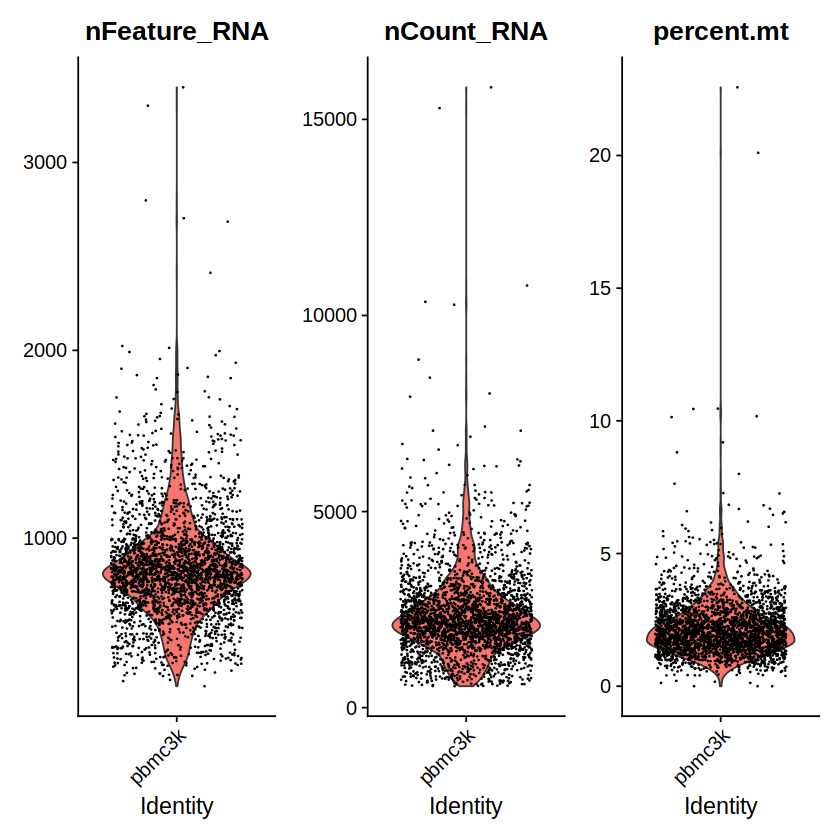

In [13]:
## Feature barcode含有的gene数
## Count barcode含有的reads counts数

VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

In [14]:
## QC 过滤
## 这里的 percent.mt 是经验值，不同的组织细胞线粒体基因比例不同
## 推荐的方法是将一定比例进行去除，而不是采用固定值

## 按 percent.mt 固定值去
pbmc <- subset(pbmc, subset = nFeature_RNA > 200 & nFeature_RNA < 2500 & percent.mt < 5)

## 按 比例进行过滤 percent.mt 
## 去除 percent.mt 值最高的前15%的barcode

## mit_percent <- 0.85
## pos<- floor(mit_percent * length(pbmc@meta.data$percent.mt))
## mit_value <- (sort(pbmc@meta.data$percent.mt))[pos]
## pbmc <- subset(x = pbmc, subset = percent.mt < mit_value) 



<font color=blue size=5> 4. 去除双胞 </font>

In [15]:
## 这里只是展示获取双胞的过程
## 一般要求给出双胞的先验值，但这个值无法准确给出，这里采用的方法不需要先验值
## 这步可以略过，从下一步[16]读取文件开始，文件可从github上下载

DF_num_before <- dim(pbmc@assays$RNA@counts)[2]
DF_num_before
count_expr <- t(as.matrix(pbmc@assays$RNA@counts))
name <- paste0("/shilab3/home1/xielu/data/shi_bio/Doublet.exp.t.xls")
write.table(count_expr,file=name,sep="\t",col.names=NA,quote=F)
system("~/software/miniconda3/envs/R4/bin/python /shilab3/home1/xielu/data/shi_bio/run_doubletdetection.py /shilab3/home1/xielu/data/shi_bio/Doublet.exp.t.xls /shilab3/home1/xielu/data/shi_bio/")

[1] 2638

In [16]:
library(dplyr)
pbmc@meta.data$DF.classifications <- colnames(pbmc)
D_S <- read.csv("/shilab3/home1/xielu/data/shi_bio/obs.csv")
names(D_S)[1] <- 'barcode'
doublet_barcode <- filter(D_S, doublet == '1')
single_barcode <- filter(D_S, doublet == '0')
pbmc@meta.data$DF.classifications[pbmc@meta.data$DF.classifications %in% doublet_barcode$barcode] <- "Doublet"
pbmc@meta.data$DF.classifications[pbmc@meta.data$DF.classifications %in% single_barcode$barcode] <- "Singlet"

## 挑选单胞barcode
pbmc <- subset(pbmc, subset = DF.classifications %in% c("Singlet"))

DF_num_after <- dim(pbmc@assays$RNA@counts)[2]
DF_precent <- round((DF_num_before - DF_num_after)/DF_num_before,5)
print (paste0("Doublet rate: ",DF_precent))


[1] "Doublet rate: 0.00682"


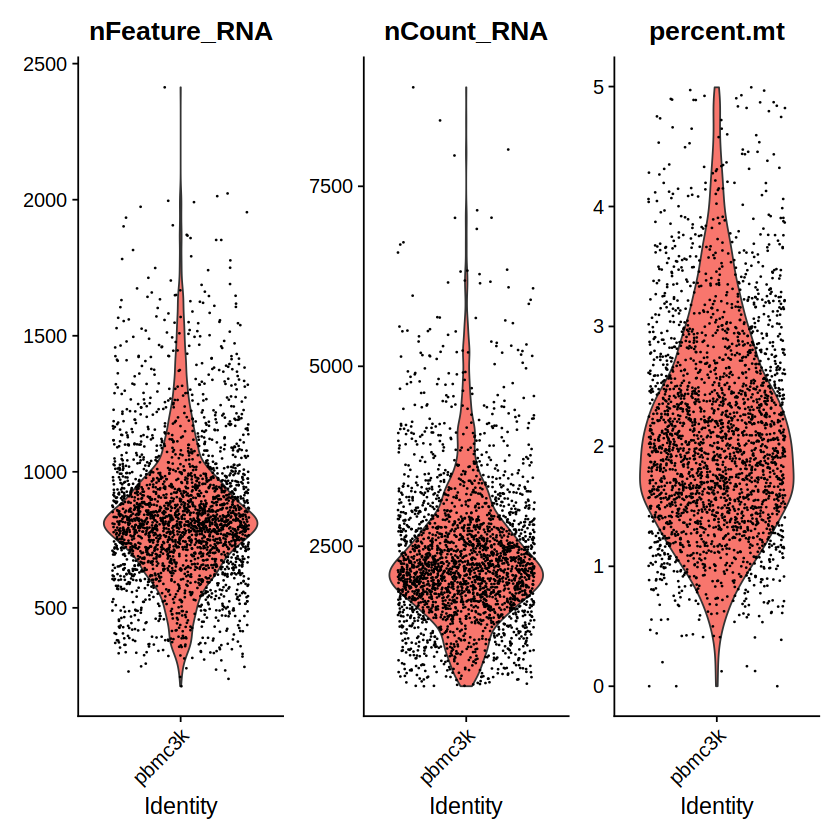

In [17]:
## 绘制过滤后质控图

VlnPlot(pbmc, features = c("nFeature_RNA", "nCount_RNA", "percent.mt"), ncol = 3)

<font color=blue size=5> 5. 去除细胞周期的影响 </font>

In [18]:
## 同一种细胞类型会处于不同的细胞生长周期，不同的细胞周期相关的基因表达会存在差异，这种差异会可能会同类细胞被区分开
## 而这种区分并不是我们所需要的

all.genes <- rownames(x = pbmc)
pbmc <- ScaleData(object = pbmc, features = all.genes)
## 主要过程是根据3个周期的Marker gene 对细胞处于的时期进行评分

s.genes <- cc.genes$s.genes
g2m.genes <- cc.genes$g2m.genes
pbmc <- CellCycleScoring(object = pbmc, s.features = s.genes, g2m.features = g2m.genes, set.ident = TRUE)

Centering and scaling data matrix

Warning message:
“The following features are not present in the object: DTL, UHRF1, MLF1IP, EXO1, CASP8AP2, BRIP1, E2F8, not searching for symbol synonyms”
Warning message:
“The following features are not present in the object: FAM64A, BUB1, HJURP, CDCA3, TTK, CDC25C, DLGAP5, CDCA2, ANLN, GAS2L3, not searching for symbol synonyms”


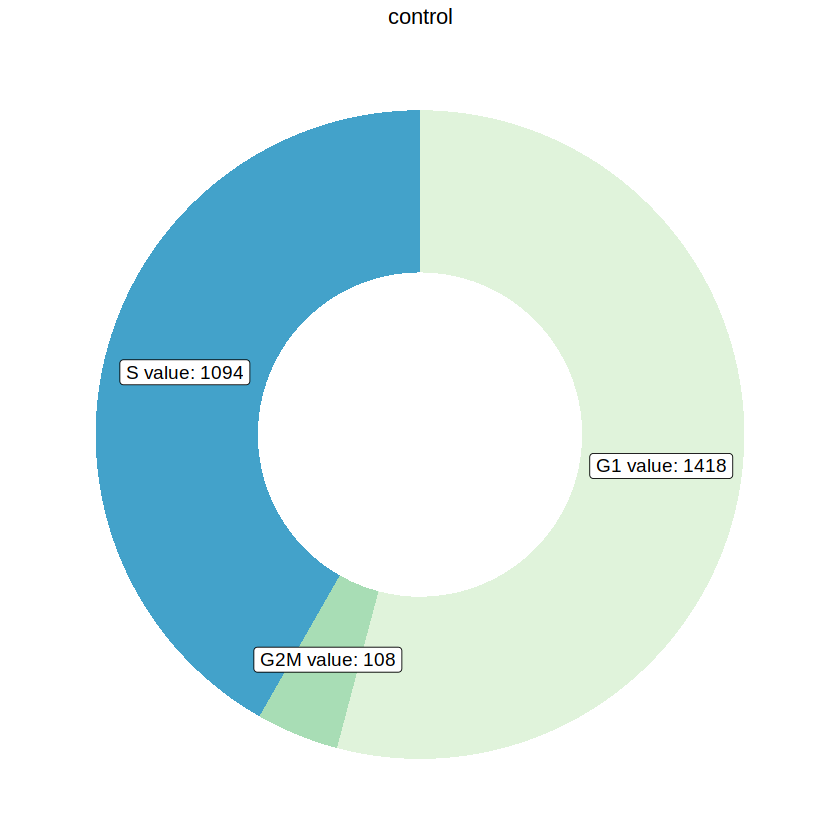

In [19]:
CellCycleScoring_res <- data.frame(
   barcode = rownames(pbmc[[]]),S.Score = pbmc[[]]$S.Score,
   G2M.Score = pbmc[[]]$G2M.Score,Phase = pbmc[[]]$Phase
)
df <- data.frame(
    phase_type = factor(1:length(table(CellCycleScoring_res$Phase)),labels = names(table(CellCycleScoring_res$Phase))),
    num = as.numeric(table(CellCycleScoring_res$Phase))
)
df$fraction<-df$num/sum(df$num)
df$ymax<-cumsum(df$fraction)
df$ymin<-c(0,head(df$ymax,n=-1))
df$labelPosition<-(df$ymax + df$ymin)/2
df$label<-paste0(df$phase_type," value: ",df$num)

## 绘制不同生长周期的细胞占比
## G1期:DNA合前期
## S期:DNA复制期
## G2期:DNA合成后期

ggplot(df,aes(ymax=ymax,ymin=ymin,xmax=4,xmin=3))+geom_rect(aes(fill=phase_type))+ geom_label(x=3.5,aes(y=labelPosition,label=label),size=4)+scale_fill_brewer(palette = 4)+
coord_polar(theta = "y")+xlim(2,4)+theme_void()+ labs(title = 'control')+theme(legend.position = "none",plot.title = element_text(hjust = 0.5))

Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 17 features requested have not been scaled (running reduction without them): DTL, UHRF1, MLF1IP, EXO1, CASP8AP2, BRIP1, E2F8, FAM64A, BUB1, HJURP, CDCA3, TTK, CDC25C, DLGAP5, CDCA2, ANLN, GAS2L3”
Warning message in PrepDR(object = object, features = features, verbose = verbose):
“The following 1 features requested have zero variance (running reduction without them): CDC6”
Warning message in irlba(A = t(x = object), nv = npcs, ...):
“You're computing too large a percentage of total singular values, use a standard svd instead.”
PC_ 1 
Positive:  MKI67, TYMS, RRM2, HMGB2, TUBB4B, ANP32E, TACC3, AURKB, UBE2C, GINS2 
	   NCAPD2, BIRC5, NASP, MCM6, RRM1, CKS1B, HMMR, FEN1, MCM2, MCM5 
	   CLSPN, PSRC1, RAD51, TOP2A, KIF2C, CKS2, NUSAP1, WDR76, GMNN, KIF20B 
Negative:  POLD3, DSCC1, CDK1, KIF23, CCNE2, ECT2, NEK2, G2E3, CHAF1B, POLA1 
	   RAD51AP1, ATAD2, CKAP5, BLM, MCM4, TIPIN, RPA2, SLBP, RAN

[1] "There is no need to remove the cell cycle effect: 0.661450381679389"


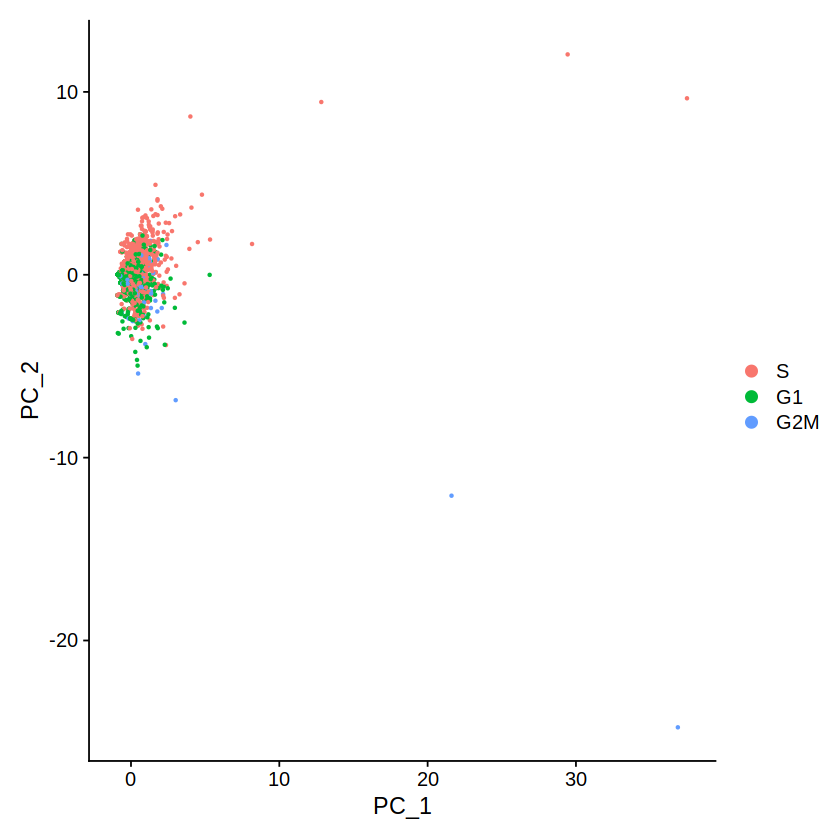

In [20]:
## 是否存在细胞周期的判断：
##（1） 根据PCA的位点信息选取部分数据生成线性判断模型
##（2） 用模型对其余数据进行3个周期的预测
##（3） 当超过20%的细胞可以被准确地分到三个区域时则表示存在细胞周期影响， 基于细胞周期的 Marker gene 对分类会产生影响

res <- c()

pbmc <- RunPCA(object = pbmc, features = c(s.genes, g2m.genes))
DimPlot(pbmc,reduction = "pca")

for (i in 1:50) {
    data <- DimPlot(pbmc,reduction = "pca")$data
    pick_train <- sample( seq_along(data[,1]),length(data[,1])/2 )
    train_data <- data[pick_train,]
    test_data <- data[which(! seq_along(data[,1]) %in% pick_train),]
    lda.model <- lda(train_data[,1:2], grouping = train_data[,3])
    pre_ldal <- predict(lda.model,test_data[,1:2])
    res <- c(res,1-sum(as.numeric(as.numeric(pre_ldal$class)!=as.numeric(test_data[,3])))/nrow(test_data))
}
remove_cc_effect <- 'part'

## 当res值大于 0.8 时才被判断为存在细胞周期影响
## 消除细胞周期的过程是对3个周期的 Markergene 进行均一化处理

if( mean(res) >= 0.8 ) {
    cat("There is cell cycle effect!\n")
    if( remove_cc_effect == 'all'){
        pbmc <- ScaleData(pbmc, vars.to.regress = c("S.Score", "G2M.Score"), features = rownames(pbmc))
    }else if( remove_cc_effect == 'part' ){
        pbmc$CC.Difference <- pbmc$S.Score - pbmc$G2M.Score
        pbmc <- ScaleData(pbmc, vars.to.regress = "CC.Difference", features = rownames(pbmc))
}
    pbmc <- RunPCA(object = pbmc, features = c(s.genes, g2m.genes))
    print(DimPlot(pbmc,reduction = "pca"))
}else{
    print(paste0("There is no need to remove the cell cycle effect: ", mean(res)))
}


<div align=right>
    <img src="./shi_lab/cat1.png" height="120" width="120"/>
</div>

<font color=blue size=5> 6. 数据的标准化、降维、聚类</font>

In [21]:
pbmc <- NormalizeData(pbmc)

In [22]:
## 高变gene筛选，减少数据维度
## 采用高变gene对细胞的聚类和鉴定没有影响
## 非高变基因（低阳性率基因也会和某些功能相关，逐渐被关注）
## 2000 是默认值，但是捕获细胞数较小时可以降低该值

pbmc <- FindVariableFeatures(pbmc, selection.method = "vst", nfeatures = 2000)

In [23]:
top10 <- head(VariableFeatures(pbmc), 10)
top10

[1] "PPBP"   "S100A9" "LYZ"    "IGLL5"  "GNLY"   "FTL"    "PF4"    "FTH1"  
 [9] "S100A8" "FCER1A"

Warning message:
“Transformation introduced infinite values in continuous x-axis”
When using repel, set xnudge and ynudge to 0 for optimal results

Warning message:
“Transformation introduced infinite values in continuous x-axis”


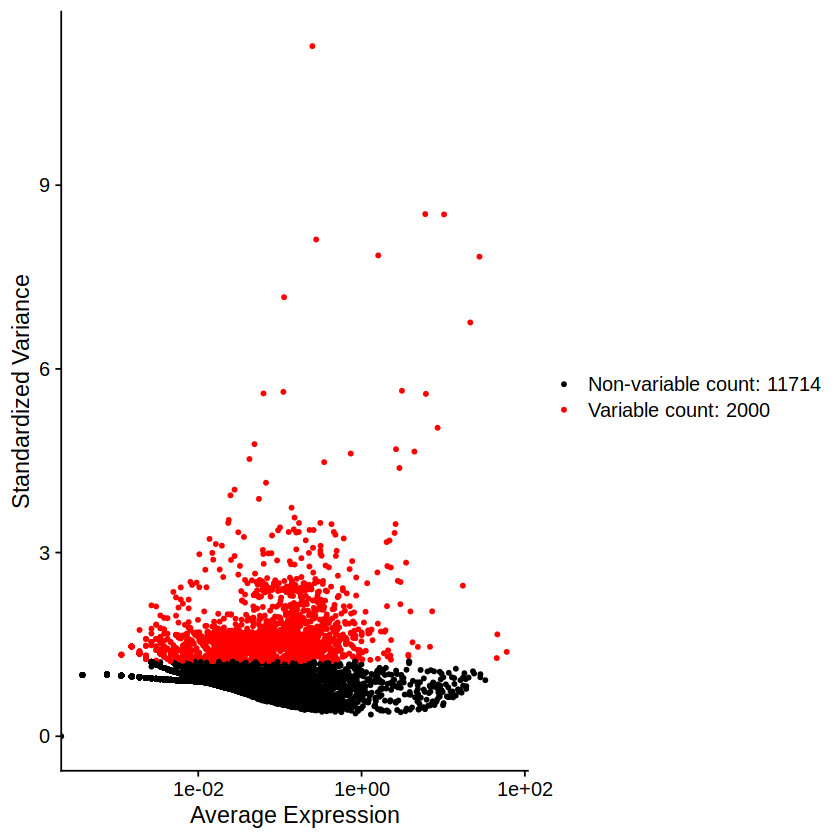

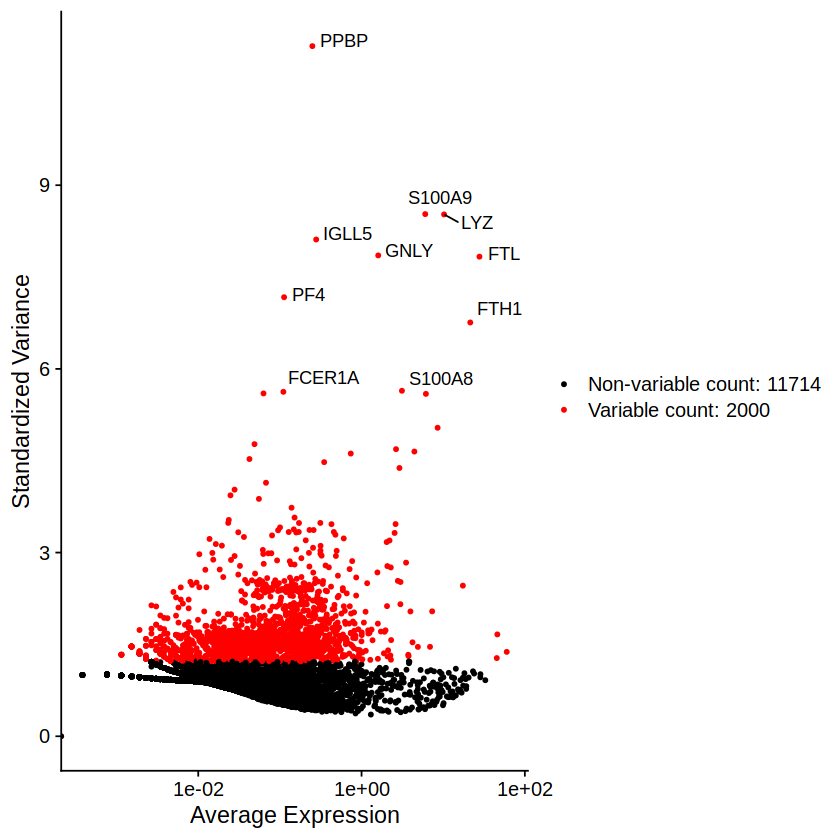

In [24]:
plot1 <- VariableFeaturePlot(pbmc)
plot1
plot2 <- LabelPoints(plot = plot1, points = top10, repel = TRUE)
plot2

In [25]:
## 数据的均一化
## 这个是PCA等降维技术的标准预处理步骤
## 改变每个基因的表达，使细胞间的平均表达为 0， 所以scale.data 里面的值会出现负值
## 缩放每个基因的表达，使细胞间的方差为 1

all.genes <- rownames(pbmc)
pbmc <- ScaleData(pbmc, features = all.genes)

Centering and scaling data matrix



PC_ 1 
Positive:  MALAT1, LTB, IL32, IL7R, CD2, B2M, ACAP1, CD27, STK17A, CTSW 
	   CD247, GIMAP5, AQP3, CCL5, SELL, MAL, TRAF3IP3, GZMA, CST7, ITM2A 
	   GIMAP7, MYC, HOPX, BEX2, LDLRAP1, ETS1, GZMK, ZAP70, OPTN, TNFAIP8 
Negative:  CST3, TYROBP, LST1, AIF1, FTL, FTH1, LYZ, FCN1, S100A9, TYMP 
	   FCER1G, CFD, LGALS1, SERPINA1, CTSS, S100A8, LGALS2, IFITM3, SPI1, CFP 
	   PSAP, IFI30, SAT1, COTL1, S100A11, NPC2, GRN, LGALS3, GSTP1, PYCARD 
PC_ 2 
Positive:  NKG7, PRF1, CST7, GZMB, GZMA, FGFBP2, GNLY, CTSW, B2M, SPON2 
	   CCL4, GZMH, FCGR3A, CCL5, CD247, XCL2, CLIC3, AKR1C3, SRGN, HOPX 
	   TTC38, APMAP, CTSC, IGFBP7, S100A4, ID2, XCL1, ANXA1, TPST2, RHOC 
Negative:  CD79A, TCL1A, HLA-DQA1, HLA-DQB1, HLA-DRA, LINC00926, CD79B, HLA-DRB1, CD74, HLA-DMA 
	   HLA-DQA2, HLA-DPB1, CD37, LTB, HLA-DRB5, HLA-DMB, HLA-DPA1, FCRLA, HVCN1, BLNK 
	   P2RX5, IGLL5, IRF8, QRSL1, SWAP70, ARHGAP24, FCGR2B, SMIM14, PPP1R14A, C16orf74 
PC_ 3 
Positive:  HLA-DQA1, HLA-DPA1, HLA-DQB1, HLA-DPB1, CD79A, CD7

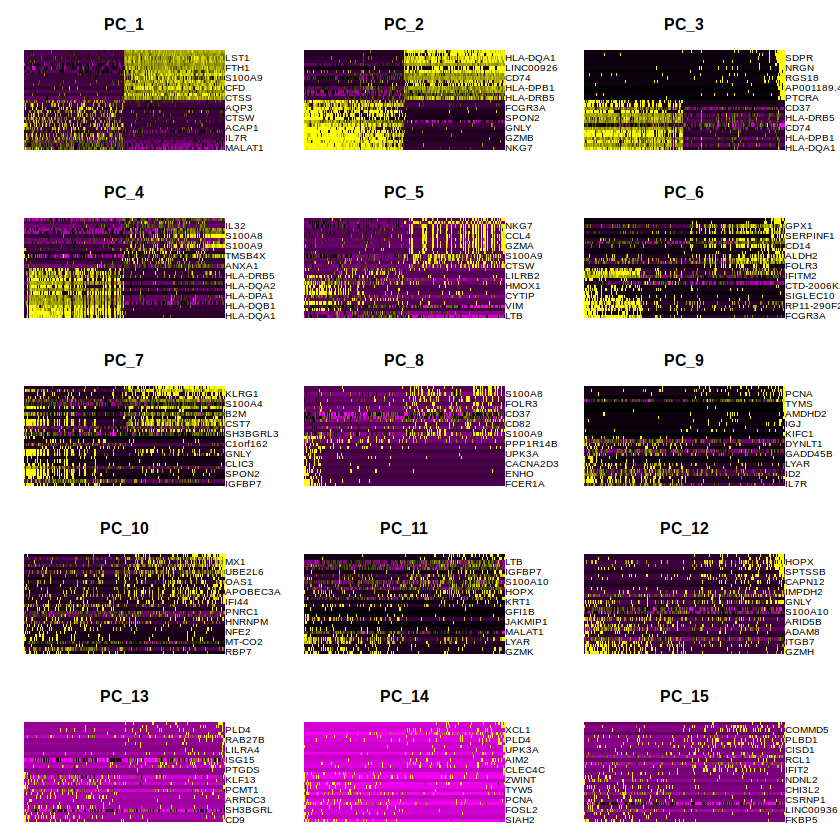

In [26]:
## 降维 这里采用的是线性降维
## 热图反应 barcode在不同维度被区分的程度

pbmc <- RunPCA(pbmc, features = VariableFeatures(object = pbmc))
DimHeatmap(pbmc, dims = 1:15, cells = 500, balanced = TRUE)

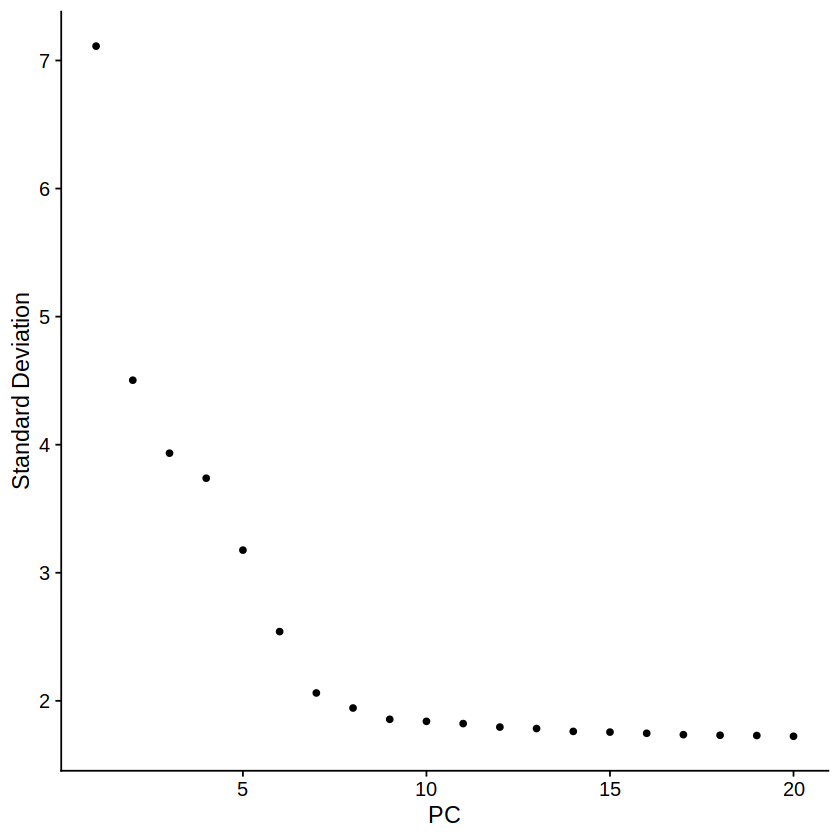

In [27]:
## 拐点表示大部分真实信息可以被捕获的维度
## 如果电脑内存不够可略过该步

pbmc <- JackStraw(pbmc, num.replicate = 100)
pbmc <- ScoreJackStraw(pbmc, dims = 1:20)
ElbowPlot(pbmc)

<font color=blue size=5> 7. 细胞聚类</font>

In [28]:
##  FindNeighbors 利用空间欧氏距离构建KNN网络
##  FindClusters  基于网络利用Louvain算法迭代形成cluster
##  resolution cluster 的分辨率，值越大形成的cluster越多，当结果无法将细胞区分开始，可调大改值

pbmc <- FindNeighbors(pbmc, dims = 1:10)
pbmc <- FindClusters(pbmc, resolution = 0.5)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 2620
Number of edges: 95076

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8729
Number of communities: 9
Elapsed time: 0 seconds


In [29]:
## 查看barcode的cluster

head(Idents(pbmc), 5)

AAACATACAACCAC-1 AAACATTGAGCTAC-1 AAACATTGATCAGC-1 AAACCGTGCTTCCG-1 
               1                3                1                2 
AAACCGTGTATGCG-1 
               6 
Levels: 0 1 2 3 4 5 6 7 8

In [30]:
## 统计每个cluster的细胞数

table(pbmc@meta.data$seurat_clusters)


  0   1   2   3   4   5   6   7   8 
663 491 467 339 301 164 149  33  13 

In [31]:
## 将高维空间的cluster在二维中进行展示

pbmc <- RunUMAP(pbmc, dims = 1:10)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
11:06:58 UMAP embedding parameters a = 0.9922 b = 1.112

11:06:58 Read 2620 rows and found 10 numeric columns

11:06:58 Using Annoy for neighbor search, n_neighbors = 30

11:06:58 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:06:58 Writing NN index file to temp file /tmp/Rtmpmessb7/file73eddaceb41

11:06:58 Searching Annoy index using 1 thread, search_k = 3000

11:06:59 Annoy recall = 100%

11:06:59 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 

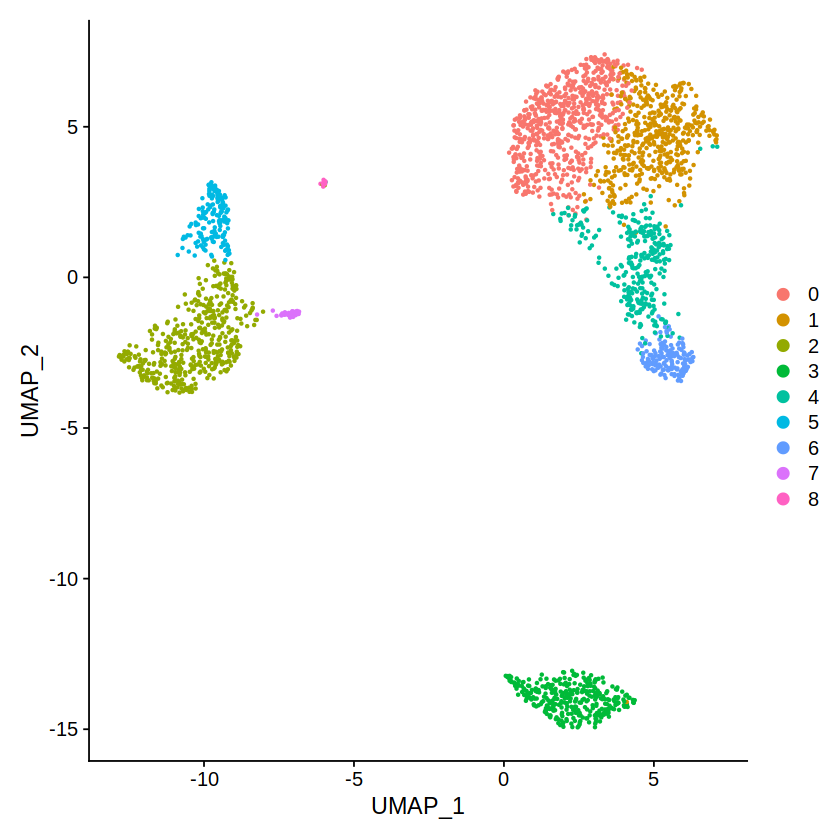

In [32]:
DimPlot(pbmc, reduction = "umap")

<font color=blue size=5> 8. 差异基因分析</font>

In [33]:
## FindAllMarkers 用于当前cluster 和 其他剩余cluster的比较，获得 marker gene， 
## FindMarkers 用于当前cluster 和 其他另一个cluster的比较，获得 marker gene
## 默认采用的是Wilcoxon秩和检验获得差异基因

pbmc.markers <- FindAllMarkers(pbmc, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
pbmc.markers_top10 <- pbmc.markers %>% group_by(cluster) %>% slice_max(n = 10, order_by = avg_log2FC)
head(pbmc.markers_top10)

Calculating cluster 0

For a more efficient implementation of the Wilcoxon Rank Sum Test,
(default method for FindMarkers) please install the limma package
--------------------------------------------
install.packages('BiocManager')
BiocManager::install('limma')
--------------------------------------------
After installation of limma, Seurat will automatically use the more 
efficient implementation (no further action necessary).
This message will be shown once per session

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



p_val,avg_log2FC,pct.1,pct.2,p_val_adj,cluster,gene
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<chr>
5.488941e-85,1.3322369,0.448,0.110,7.527533e-81,0,CCR7
2.213978e-112,1.0993256,0.919,0.590,3.036250e-108,0,LDHB
1.011807e-52,1.0806802,0.347,0.102,1.387593e-48,0,LEF1
8.276268e-44,1.0253797,0.336,0.112,1.135007e-39,0,PRKCQ-AS1
9.035491e-46,0.9812239,0.449,0.185,1.239127e-41,0,PIK3IP1
5.913154e-49,0.9777630,0.632,0.359,8.109299e-45,0,NOSIP


差异基因的可视化

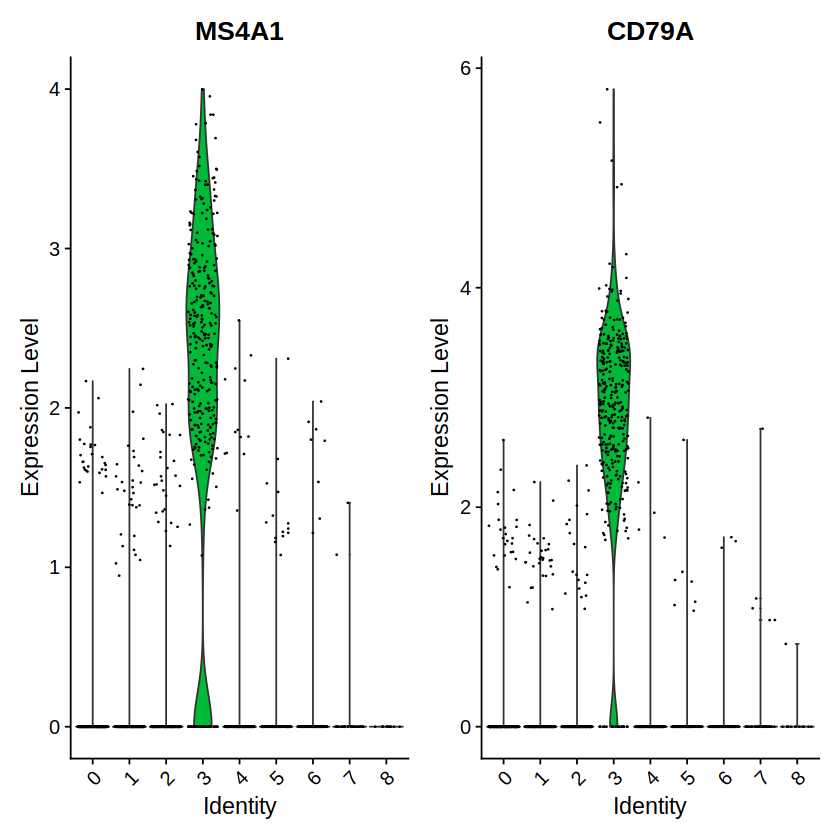

In [34]:
VlnPlot(pbmc, features = c("MS4A1", "CD79A"))

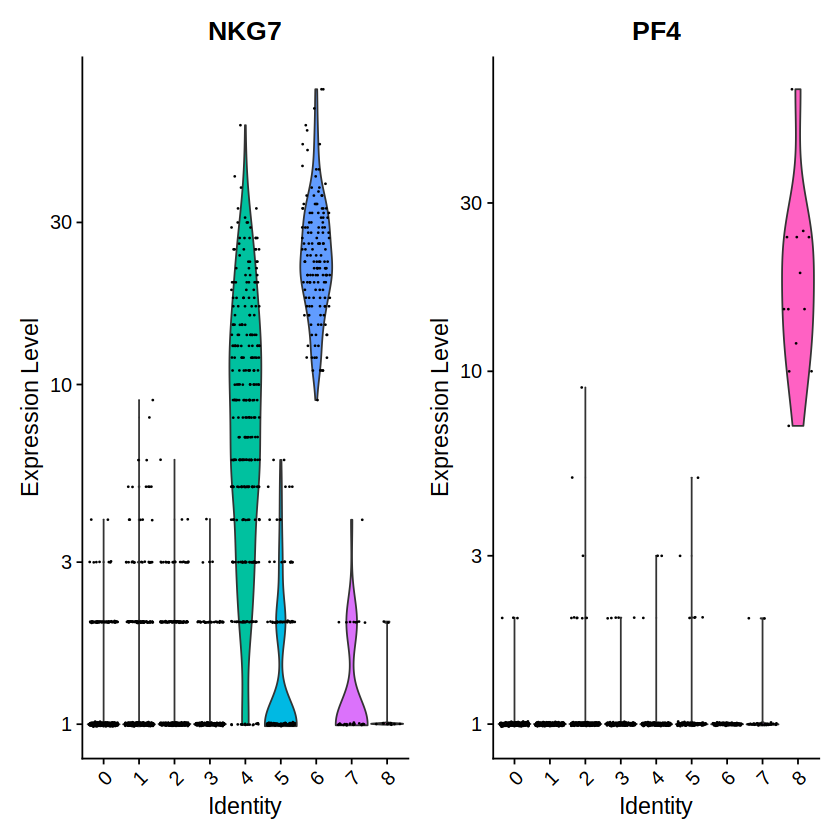

In [35]:
VlnPlot(pbmc, features = c("NKG7", "PF4"), slot = "counts", log = TRUE)

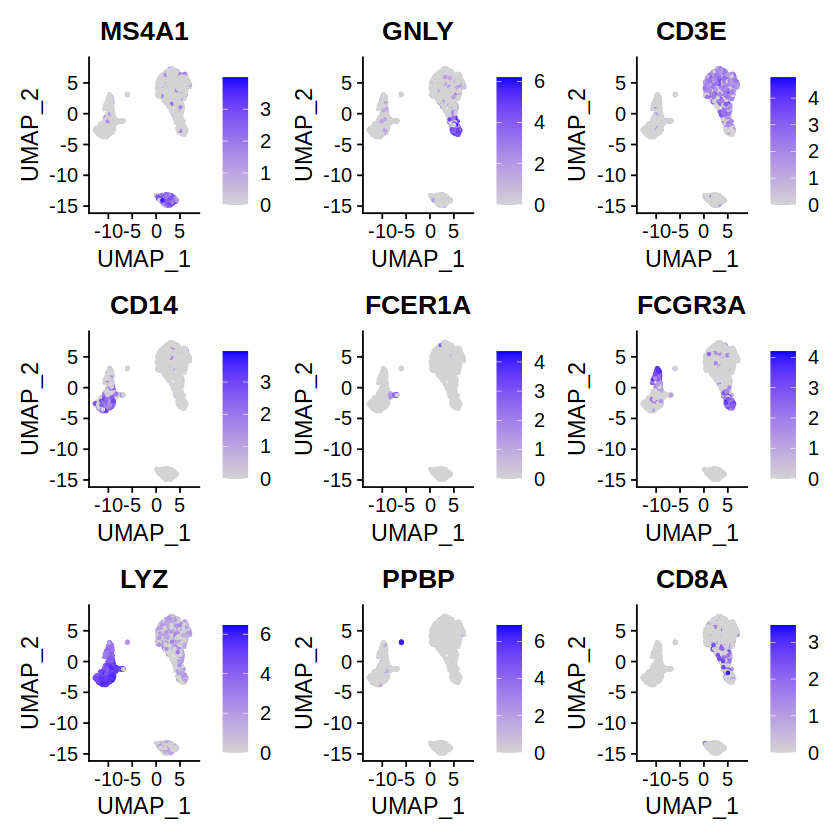

In [36]:
FeaturePlot(pbmc, features = c("MS4A1", "GNLY", "CD3E", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP", "CD8A"))

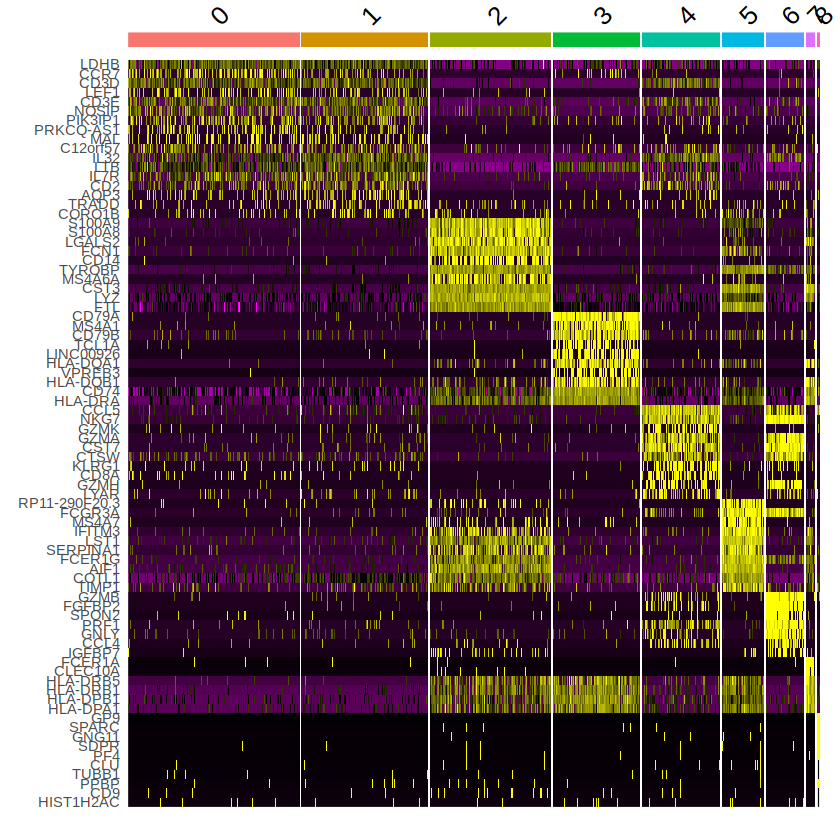

In [37]:
pbmc.markers %>%     group_by(cluster) %>%     top_n(n = 10, wt = avg_log2FC) -> top10  
DoHeatmap(pbmc, features = top10$gene) + NoLegend()

<div align=right>
    <img src="./shi_lab/wen.png" height="120" width="120"/>
</div>

<font color=blue size=5>9. 细胞类型的注释</font>

细胞类型的注释（1）基于Marker gene （2）基于表达谱的相似性， 这里用展示基于Marker gene 的简单应用

In [38]:
# 读取 CellMarker 数据库

#Cellmarker_DB <- read.table("/shilab3/home1/xielu/data/shi_bio/Human_cell_markers.txt",sep="\t", header=T)
Cellmarker_DB <- read.table("/shilab3/home1/xielu/data/shi_bio/Human_cell_markers.splitxls",sep="\t", header=T)
Cellmarker_DB <- Cellmarker_DB[c("cellMarker", "cellName")]
head(Cellmarker_DB)


,cellMarker,cellName
,<chr>,<chr>
1,IntestinalAlkaline Phosphatase,Proximal tubular cell
2,Synaptophysin,Ito cell (hepatic stellate cell)
3,CEACAM1,Trophoblast cell
4,VASA,Primordial germ cell
5,KLF6,Epithelial cell
6,FGF10,Cytotrophoblast


In [39]:
## 以前top10 的Marker 进行Celltype 注释, 选择top10 marker 中占比最多的 CellType
## 需要人工check！
## 和注释工具进行比较，如 SingleR 等

assign_cellType <- function(cluster_marker,cellType){
        ##cluster_marker=cluster_marker,cellType=cellType##
        cluster <- unique(cluster_marker$cluster)
        record_cellType <- NULL
        cluster_cellTye <- matrix(NA,length(cluster),2)
        colnames(cluster_cellTye)<-c("cluster","cellType")
        for (i in 1:length(cluster)){
                marker_i <- cluster_marker[cluster_marker$cluster == cluster[i],]
                marker_i <- marker_i[c("gene","cluster")]
                colnames(marker_i)<-c("markers","cluster")
                colnames(cellType)<-c("markers","cellType")
                marker_cellType_merge <- merge(marker_i,cellType)
                marker_cellType_merge <- marker_cellType_merge[!marker_cellType_merge$cellType %in% record_cellType,] #del recorded cellType
                cellType_i <- names(tail(sort(table(as.character(marker_cellType_merge$cellType))), 1)) #Get the cellType with the most marker gene assign
                if(is.null(cellType_i)){cellType_i<-cluster[i]}
                record_cellType <- c(record_cellType, cellType_i) #The recorded cellType does not appear in the next cluster
                cluster_cellTye[i,]<-c(as.character(cluster[i]),as.character(cellType_i))
                }
        return (as.data.frame(cluster_cellTye))
}
type <- assign_cellType(pbmc.markers_top10, Cellmarker_DB)
type

cluster,cellType
<chr>,<chr>
0,Natural killer T (NKT) cell
1,T cell
2,Monocyte
3,B cell
4,CD8+ T cell
5,CD1C-CD141- dendritic cell
6,CD4+ cytotoxic T cell
7,Secretory cell
8,Megakaryocyte


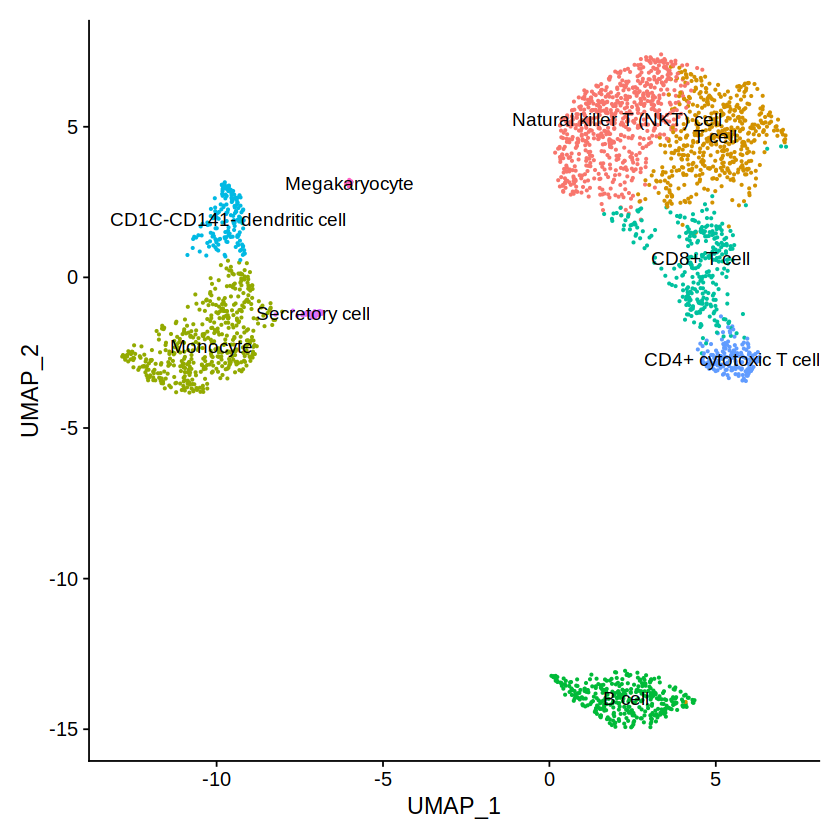

In [40]:
## cluster 进行命名
new.cluster.ids <- type$cellType
#new.cluster.ids <- c("Naive CD4 T", "CD14+ Mono", "Memory CD4 T", "B", "CD8 T", "FCGR3A+ Mono", "NK", "DC", "Platelet")

names(new.cluster.ids) <- levels(pbmc)
pbmc <- RenameIdents(pbmc, new.cluster.ids)
DimPlot(pbmc, reduction = "umap", label = TRUE, pt.size = 0.5) + NoLegend()

<font color=blue size=5>10. 批次效应/多样品整合</font>

In [41]:
## 数据导入

load("/shilab3/home1/xielu/data/shi_bio/ifnb.rda")

In [42]:
ls()

[1] "all.genes"            "assign_cellType"      "CellCycleScoring_res"
 [4] "Cellmarker_DB"        "count_expr"           "D_S"                 
 [7] "data"                 "df"                   "DF_num_after"        
[10] "DF_num_before"        "DF_precent"           "doublet_barcode"     
[13] "g2m.genes"            "i"                    "ifnb"                
[16] "lda.model"            "name"                 "new.cluster.ids"     
[19] "pbmc"                 "pbmc.data"            "pbmc.markers"        
[22] "pbmc.markers_top10"   "pick_train"           "plot1"               
[25] "plot2"                "pre_ldal"             "remove_cc_effect"    
[28] "res"                  "s.genes"              "single_barcode"      
[31] "test_data"            "top10"                "train_data"          
[34] "type"

In [43]:
## 将数据格式升级到当前Seurat对应的版本

ifnb.updated = UpdateSeuratObject(object = ifnb)

Validating object structure

Updating object slots

Ensuring keys are in the proper structure

Ensuring keys are in the proper structure

Ensuring feature names don't have underscores or pipes

Updating slots in RNA

Validating object structure for Assay ‘RNA’

Object representation is consistent with the most current Seurat version



In [44]:
## 拆分Seurat 数据

ifnb.list <- SplitObject(ifnb.updated, split.by = "stim")

In [45]:
ifnb.list <- lapply(X = ifnb.list, FUN = function(x) {
    x <- NormalizeData(x)
    x <- FindVariableFeatures(x, selection.method = "vst", nfeatures = 2000)
})

In [46]:
## 基于Anchor对数据进行整合，寻找Anchor
## 具体过程解释可参见 Comprehensive Integration of Single-Cell Data, cell, 2019
## 该步消耗内存，电脑无法运行，可减少细胞数进行尝试

features <- SelectIntegrationFeatures(object.list = ifnb.list)
immune.anchors <- FindIntegrationAnchors(object.list = ifnb.list, anchor.features = features)

Scaling features for provided objects

Finding all pairwise anchors

Running CCA

Merging objects

Finding neighborhoods

Finding anchors

	Found 16393 anchors

Filtering anchors

	Retained 6756 anchors



In [47]:
## 数据整合，也是去批次的过程

immune.combined <- IntegrateData(anchorset = immune.anchors)

Merging dataset 1 into 2

Extracting anchors for merged samples

Finding integration vectors

Finding integration vector weights

Integrating data



In [48]:
## 将默认分析数据集改为 integrated

DefaultAssay(immune.combined) <- "integrated"

In [49]:
immune.combined <- ScaleData(immune.combined, verbose = FALSE)
immune.combined <- RunPCA(immune.combined, npcs = 30, verbose = FALSE)
immune.combined <- RunUMAP(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindNeighbors(immune.combined, reduction = "pca", dims = 1:30)
immune.combined <- FindClusters(immune.combined, resolution = 0.5)

11:10:49 UMAP embedding parameters a = 0.9922 b = 1.112

11:10:49 Read 13999 rows and found 30 numeric columns

11:10:49 Using Annoy for neighbor search, n_neighbors = 30

11:10:49 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

11:10:50 Writing NN index file to temp file /tmp/Rtmpmessb7/file73ed19ca5321

11:10:50 Searching Annoy index using 1 thread, search_k = 3000

11:10:54 Annoy recall = 100%

11:10:54 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors = 30

11:10:55 Initializing from normalized Laplacian + noise (using irlba)

11:11:00 Commencing optimization for 200 epochs, with 617852 positive edges

11:11:07 Optimization finished

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 13999
Number of edges: 568996

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9056
Number of communities: 15
Elapsed time: 2 seconds


整合数据的可视化

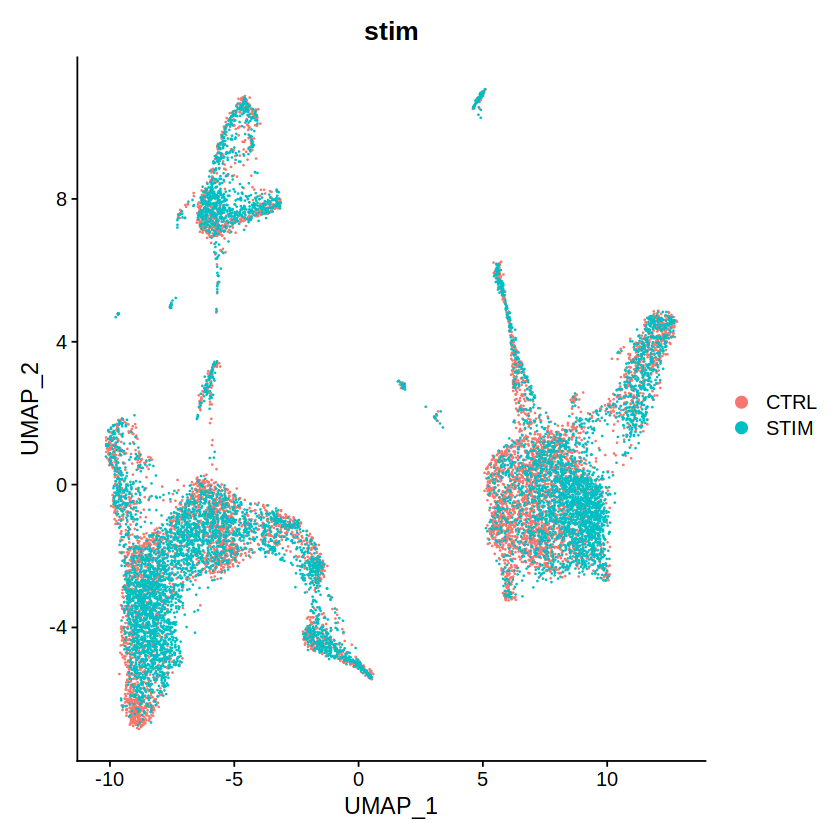

In [50]:
## 反应两样品的数据一致性

DimPlot(immune.combined, reduction = "umap", group.by = "stim")

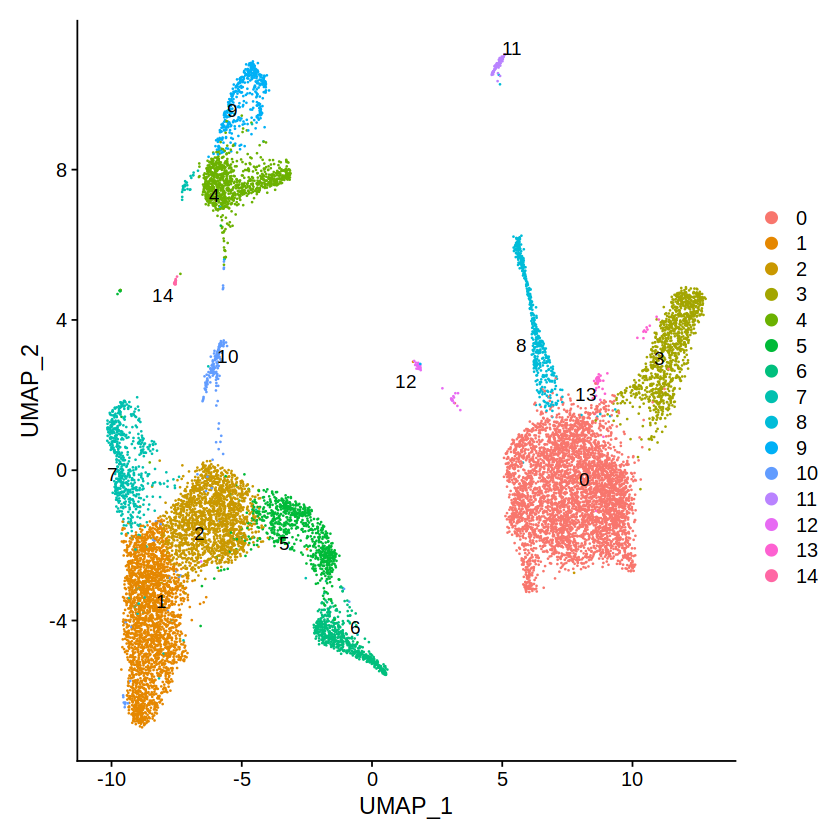

In [51]:
DimPlot(immune.combined, reduction = "umap", label = TRUE, repel = TRUE)

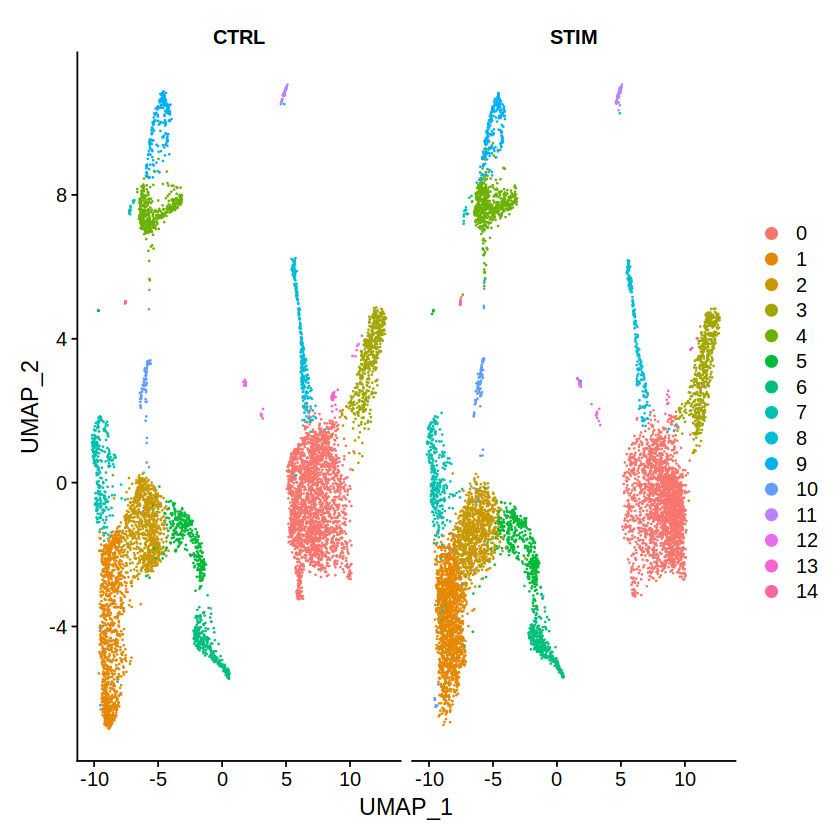

In [52]:
## 查看两个样品在某个cluster的分布情况

DimPlot(immune.combined, reduction = "umap", split.by = "stim")

In [53]:
DefaultAssay(immune.combined) <- "RNA"

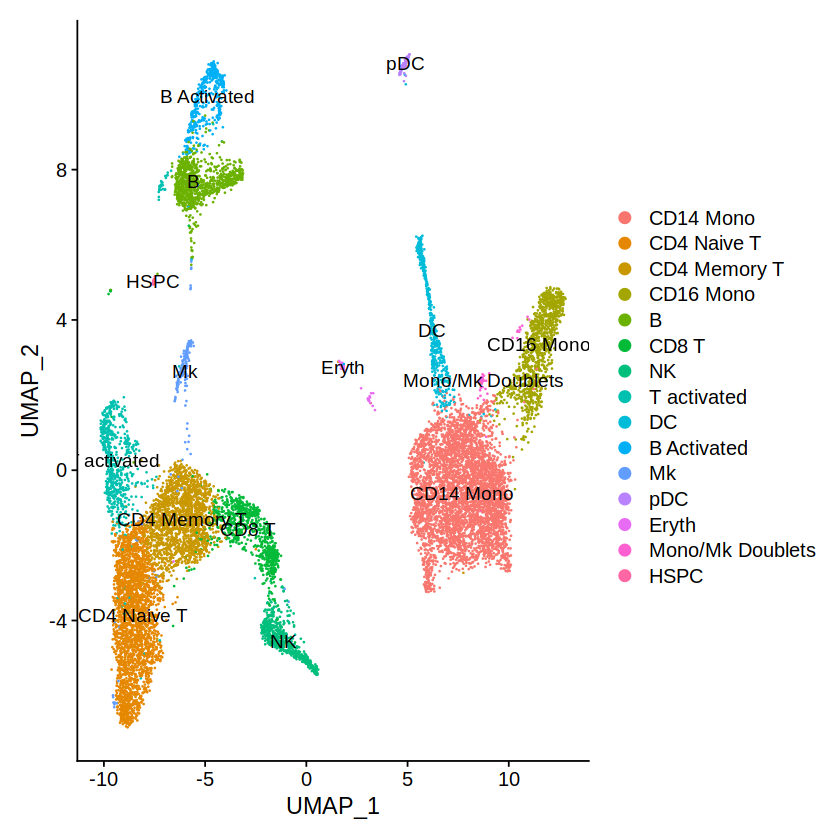

In [54]:
## Celltype 的注释，参照上述过程

immune.combined <- RenameIdents(immune.combined, `0` = "CD14 Mono", `1` = "CD4 Naive T", `2` = "CD4 Memory T",
    `3` = "CD16 Mono", `4` = "B", `5` = "CD8 T", `6` = "NK", `7` = "T activated", `8` = "DC", `9` = "B Activated",
    `10` = "Mk", `11` = "pDC", `12` = "Eryth", `13` = "Mono/Mk Doublets", `14` = "HSPC")
DimPlot(immune.combined, label = TRUE)

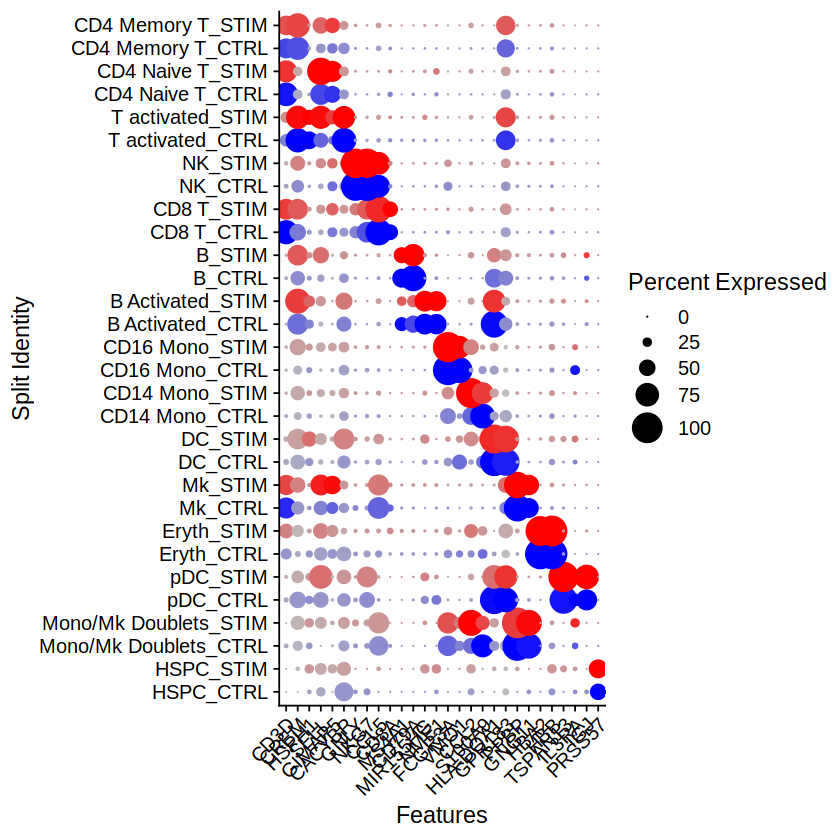

In [55]:
## marker gene 在不同celltype中的表达展示

Idents(immune.combined) <- factor(Idents(immune.combined), levels = c("HSPC", "Mono/Mk Doublets",
    "pDC", "Eryth", "Mk", "DC", "CD14 Mono", "CD16 Mono", "B Activated", "B", "CD8 T", "NK", "T activated",
    "CD4 Naive T", "CD4 Memory T"))
markers.to.plot <- c("CD3D", "CREM", "HSPH1", "SELL", "GIMAP5", "CACYBP", "GNLY", "NKG7", "CCL5",
    "CD8A", "MS4A1", "CD79A", "MIR155HG", "NME1", "FCGR3A", "VMO1", "CCL2", "S100A9", "HLA-DQA1",
    "GPR183", "PPBP", "GNG11", "HBA2", "HBB", "TSPAN13", "IL3RA", "IGJ", "PRSS57")
DotPlot(immune.combined, features = markers.to.plot, cols = c("blue", "red"), dot.scale = 8, split.by = "stim") +
    RotatedAxis()

<font color=blue size=5>11. 两种细胞类型的比较分析</font>

In [56]:
library(ggplot2)
library(cowplot)


Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [57]:
theme_set(theme_cowplot())
t.cells <- subset(immune.combined, idents = "CD4 Naive T")
Idents(t.cells) <- "stim"
avg.t.cells <- as.data.frame(log1p(AverageExpression(t.cells, verbose = FALSE)$RNA))
avg.t.cells$gene <- rownames(avg.t.cells)

In [58]:
cd14.mono <- subset(immune.combined, idents = "CD14 Mono")
Idents(cd14.mono) <- "stim"
avg.cd14.mono <- as.data.frame(log1p(AverageExpression(cd14.mono, verbose = FALSE)$RNA))
avg.cd14.mono$gene <- rownames(avg.cd14.mono)

In [59]:
genes.to.label = c("ISG15", "LY6E", "IFI6", "ISG20", "MX1", "IFIT2", "IFIT1", "CXCL10", "CCL8")
p1 <- ggplot(avg.t.cells, aes(CTRL, STIM)) + geom_point() + ggtitle("CD4 Naive T Cells")
p1 <- LabelPoints(plot = p1, points = genes.to.label, repel = TRUE)
p2 <- ggplot(avg.cd14.mono, aes(CTRL, STIM)) + geom_point() + ggtitle("CD14 Monocytes")
p2 <- LabelPoints(plot = p2, points = genes.to.label, repel = TRUE)

When using repel, set xnudge and ynudge to 0 for optimal results

When using repel, set xnudge and ynudge to 0 for optimal results



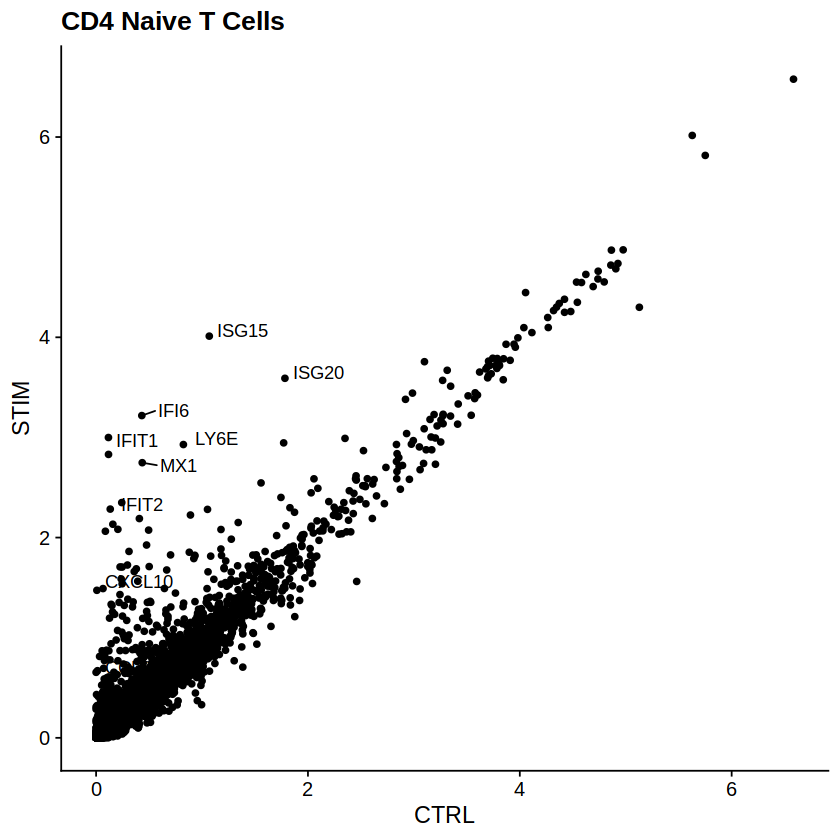

In [60]:
p1

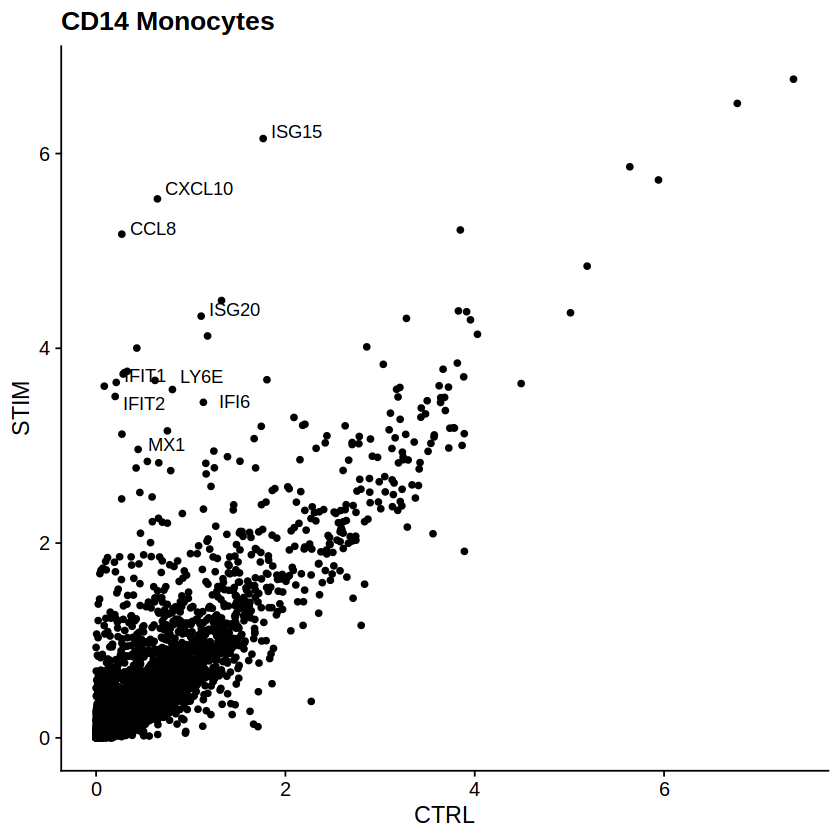

In [61]:
p2

In [62]:
immune.combined$celltype.stim <- paste(Idents(immune.combined), immune.combined$stim, sep = "_")
immune.combined$celltype <- Idents(immune.combined)
Idents(immune.combined) <- "celltype.stim"

## 注意，这里的比较分析是用的是 FindMarkers

b.interferon.response <- FindMarkers(immune.combined, ident.1 = "B_STIM", ident.2 = "B_CTRL", verbose = FALSE)
head(b.interferon.response, n = 15)

,p_val,avg_log2FC,pct.1,pct.2,p_val_adj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ISG15,4.324868e-156,4.5988082,0.998,0.239,6.077738e-152
IFIT3,7.510731e-152,4.5091462,0.966,0.052,1.055483e-147
IFI6,7.666466e-150,4.2322850,0.966,0.080,1.077369e-145
ISG20,5.660045e-147,2.9407258,1.000,0.671,7.954062e-143
IFIT1,6.158613e-138,4.1290176,0.912,0.032,8.654698e-134
MX1,8.942159e-122,3.2917007,0.906,0.115,1.256642e-117
LY6E,5.544860e-118,3.1264541,0.896,0.152,7.792192e-114
TNFSF10,6.715354e-111,3.7833149,0.793,0.025,9.437087e-107
IFIT2,3.155094e-106,3.6596696,0.784,0.035,4.433853e-102


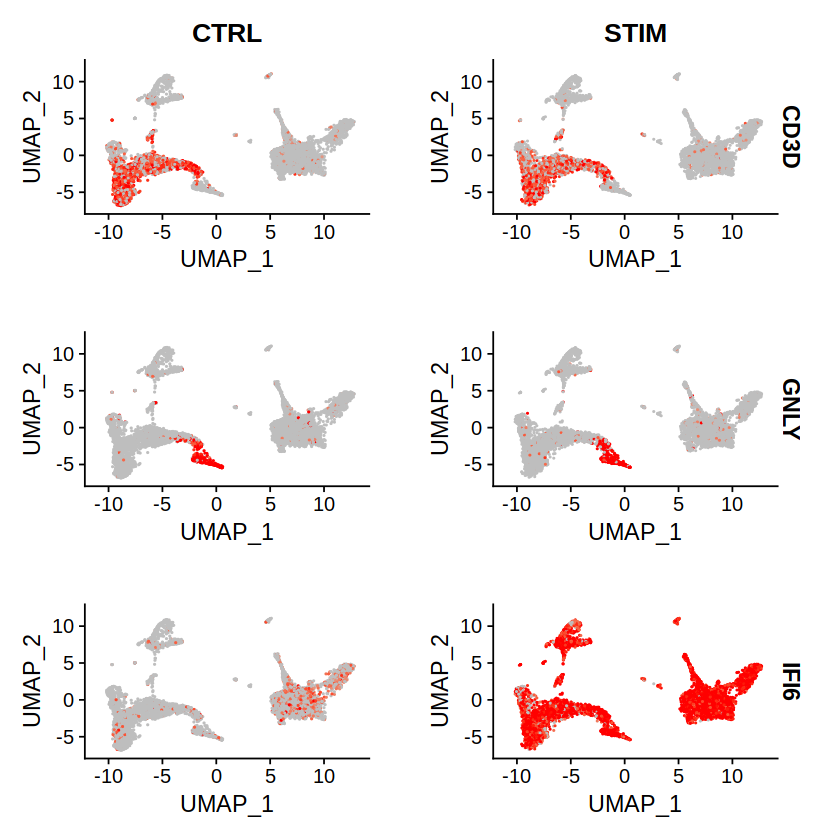

In [63]:
FeaturePlot(immune.combined, features = c("CD3D", "GNLY", "IFI6"), split.by = "stim", max.cutoff = 3,
    cols = c("grey", "red"))

The default behaviour of split.by has changed.
Separate violin plots are now plotted side-by-side.
To restore the old behaviour of a single split violin,
set split.plot = TRUE.
      
This message will be shown once per session.



[[1]]


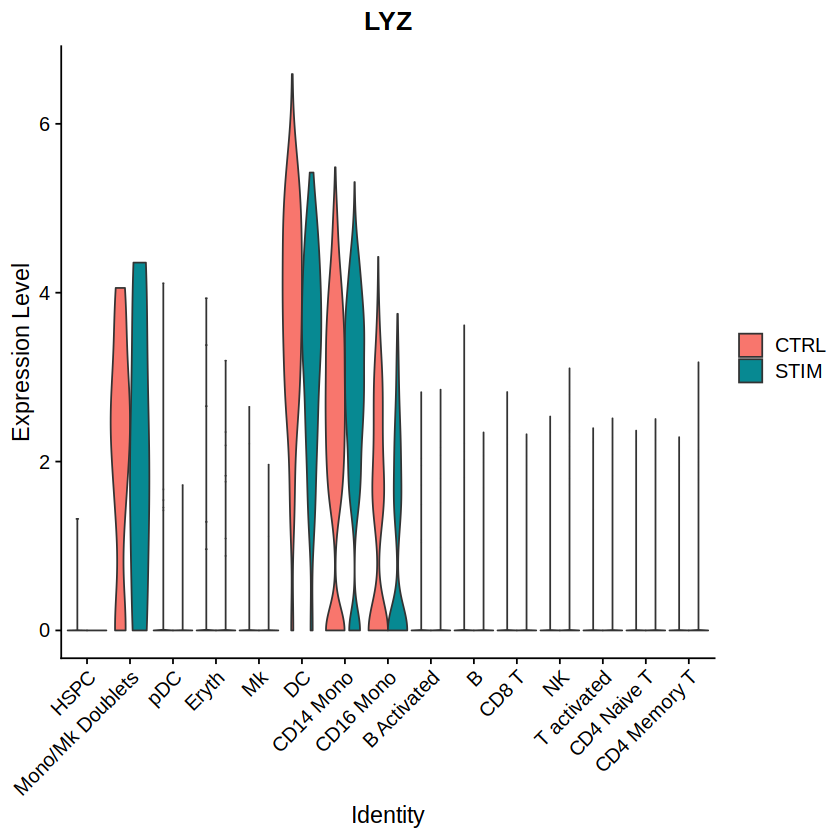

In [64]:
plots <- VlnPlot(immune.combined, features = c("LYZ"), split.by = "stim", group.by = "celltype",
    pt.size = 0, combine = FALSE) 
plots

文件的保存

In [ ]:
## 文件保存为 rds 

saveRDS(pbmc, file = "/shilab3/home1/xielu/data/shi_bio/pbmc.rds")

## 文件的读取

pbmc <- readRDS("/shilab3/home1/xielu/data/shi_bio/pbmc.rds")

<div align=right>
    <img src="./shi_lab/ku.png" height="120" width="120"/>
</div>

In [65]:
print("DONE")

[1] "DONE"
